In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("penguins.csv")

In [4]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


---
## Missing Datas

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [6]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [9]:
df["species"].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [10]:
df["sex"].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

In [11]:
df[df["sex"] == "."]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [12]:
df = df[df["sex"] != "."]

In [13]:
df["sex"].unique()

array(['MALE', 'FEMALE'], dtype=object)

<Axes: xlabel='species', ylabel='count'>

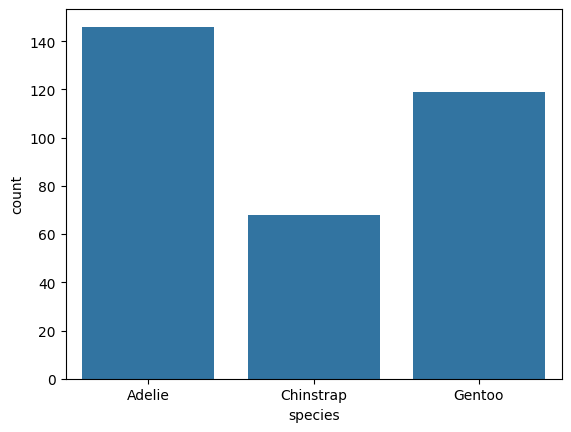

In [14]:
sns.countplot(x= "species",data= df)

<Axes: xlabel='flipper_length_mm', ylabel='body_mass_g'>

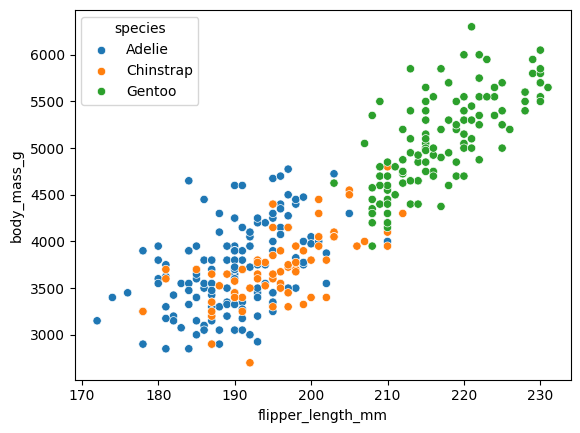

In [15]:
sns.scatterplot(x="flipper_length_mm", y="body_mass_g", data=df, hue="species")

<Axes: xlabel='culmen_length_mm', ylabel='culmen_depth_mm'>

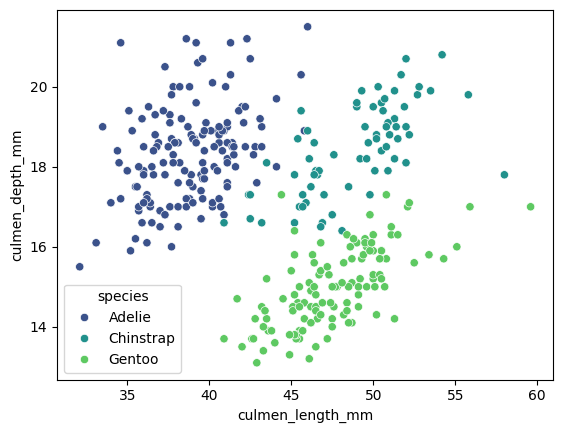

In [16]:
sns.scatterplot(x='culmen_length_mm',y='culmen_depth_mm',data=df,hue='species',palette='viridis')

<Axes: xlabel='species', ylabel='culmen_length_mm'>

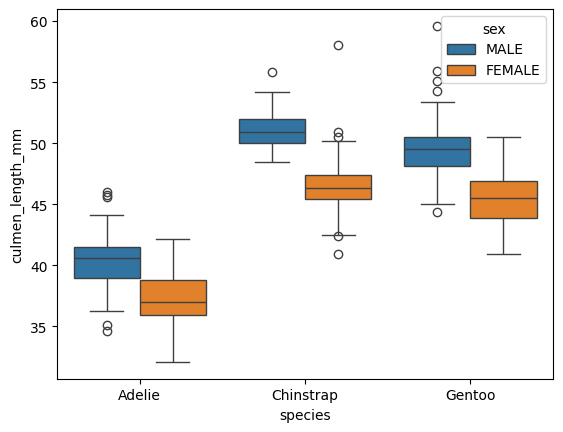

In [17]:
sns.boxplot(x="species", y="culmen_length_mm", data=df, hue="sex")

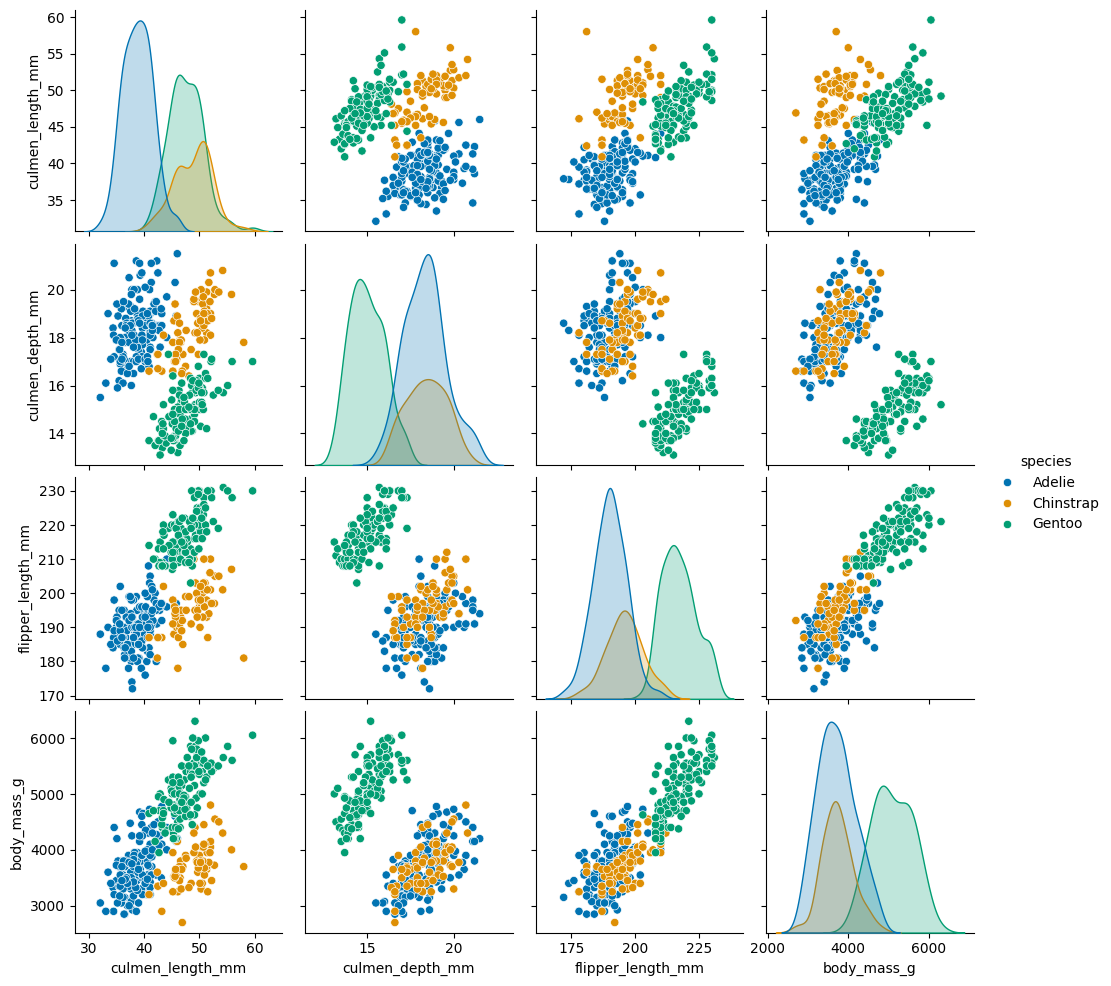

In [18]:
sns.pairplot(df, hue="species", palette="colorblind")

In [19]:
numeric_df = df.select_dtypes(include=[np.number])

<Axes: >

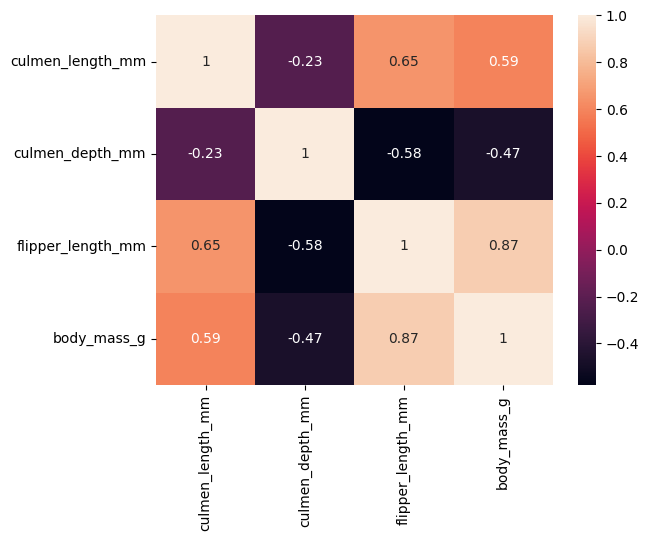

In [21]:
sns.heatmap(numeric_df.corr(), annot=True)

---
## Train Test Split

In [22]:
# pd.get_dummies(df)
# drop_first : https://stackoverflow.com/questions/63661560/drop-first-true-during-dummy-variable-creation-in-pandas
# Multicolinearity'den kaçmak için
pd.get_dummies(df.drop("species", axis= 1), drop_first=True)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
0,39.1,18.7,181.0,3750.0,False,True,True
1,39.5,17.4,186.0,3800.0,False,True,False
2,40.3,18.0,195.0,3250.0,False,True,False
4,36.7,19.3,193.0,3450.0,False,True,False
5,39.3,20.6,190.0,3650.0,False,True,True
...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,False,False,False
340,46.8,14.3,215.0,4850.0,False,False,False
341,50.4,15.7,222.0,5750.0,False,False,True
342,45.2,14.8,212.0,5200.0,False,False,False


In [23]:
X = pd.get_dummies(df.drop("species", axis= 1), drop_first=True)
y = df["species"]

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
 test_size=0.3, random_state=9)

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
model = DecisionTreeClassifier(random_state=9)

In [39]:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=9)

In [40]:
pengu_pred = model.predict(X_test)

---
## Assessment

In [41]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [42]:
confusion_matrix(y_test, pengu_pred)

array([[43,  2,  1],
       [ 0, 23,  0],
       [ 0,  0, 31]])

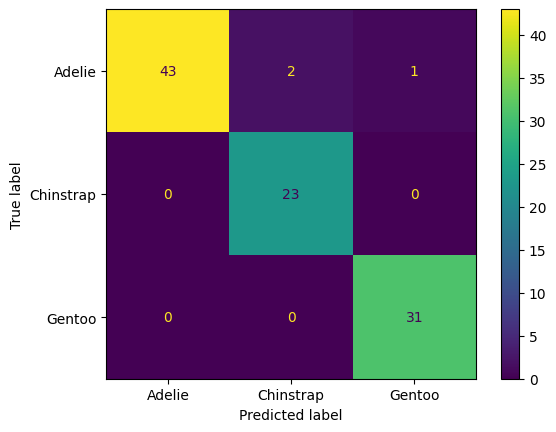

In [43]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

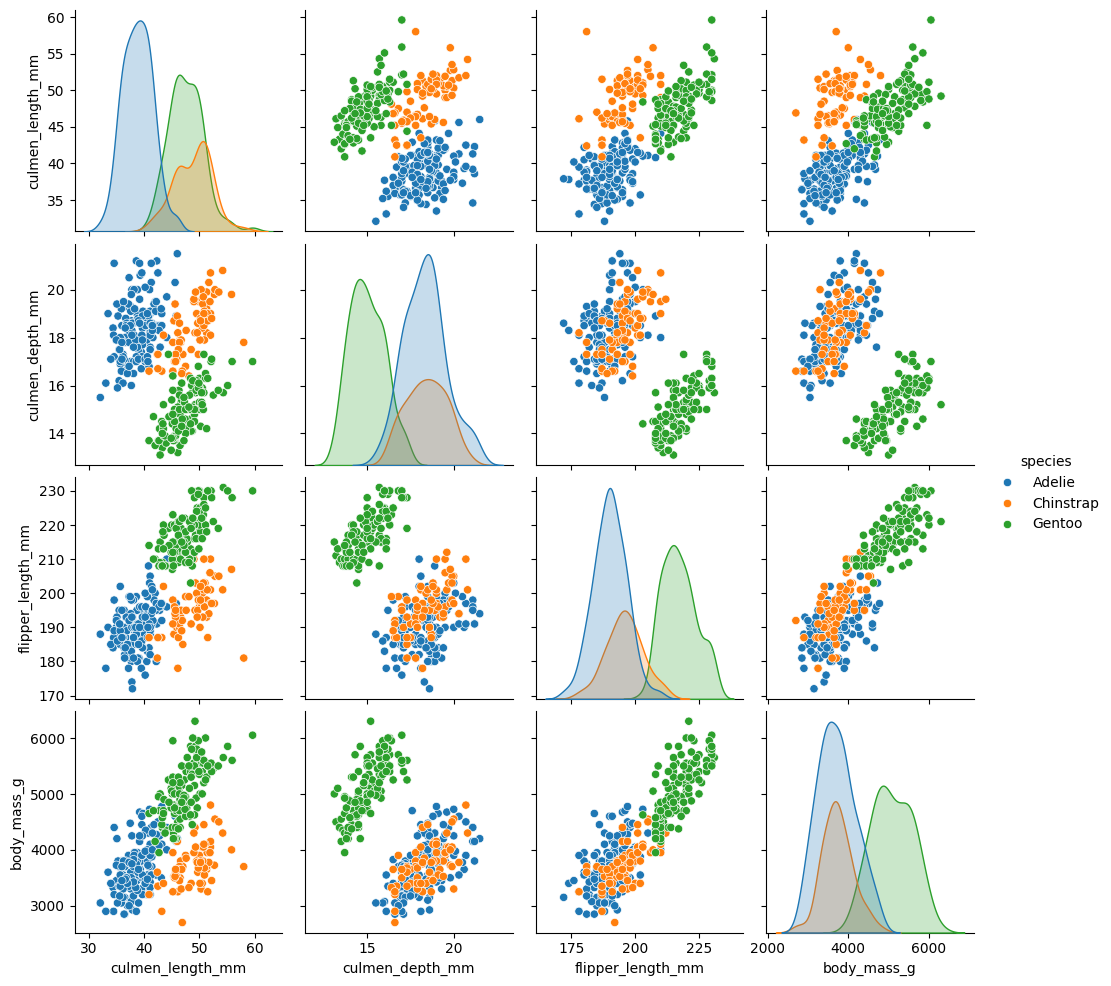

In [44]:
sns.pairplot(data=df, hue="species")

In [45]:
model.feature_importances_

array([0.35823501, 0.04125461, 0.55096018, 0.        , 0.02930107,
       0.        , 0.02024913])

In [46]:
pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=["Weight of Features"])

,Weight of Features
culmen_length_mm,0.358235
culmen_depth_mm,0.041255
flipper_length_mm,0.550960
body_mass_g,0.000000
island_Dream,0.029301
island_Torgersen,0.000000
sex_MALE,0.020249


---
## Decision Tree

In [47]:
from sklearn.tree import plot_tree

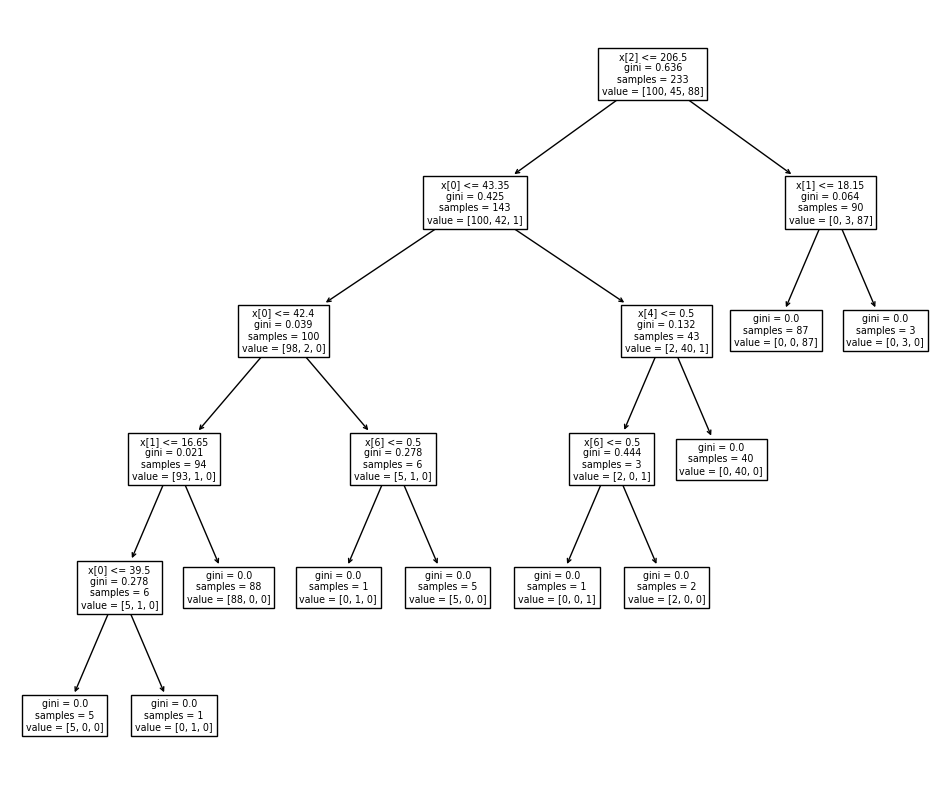

In [50]:
plt.figure(figsize=(12,10))
plot_tree(model);

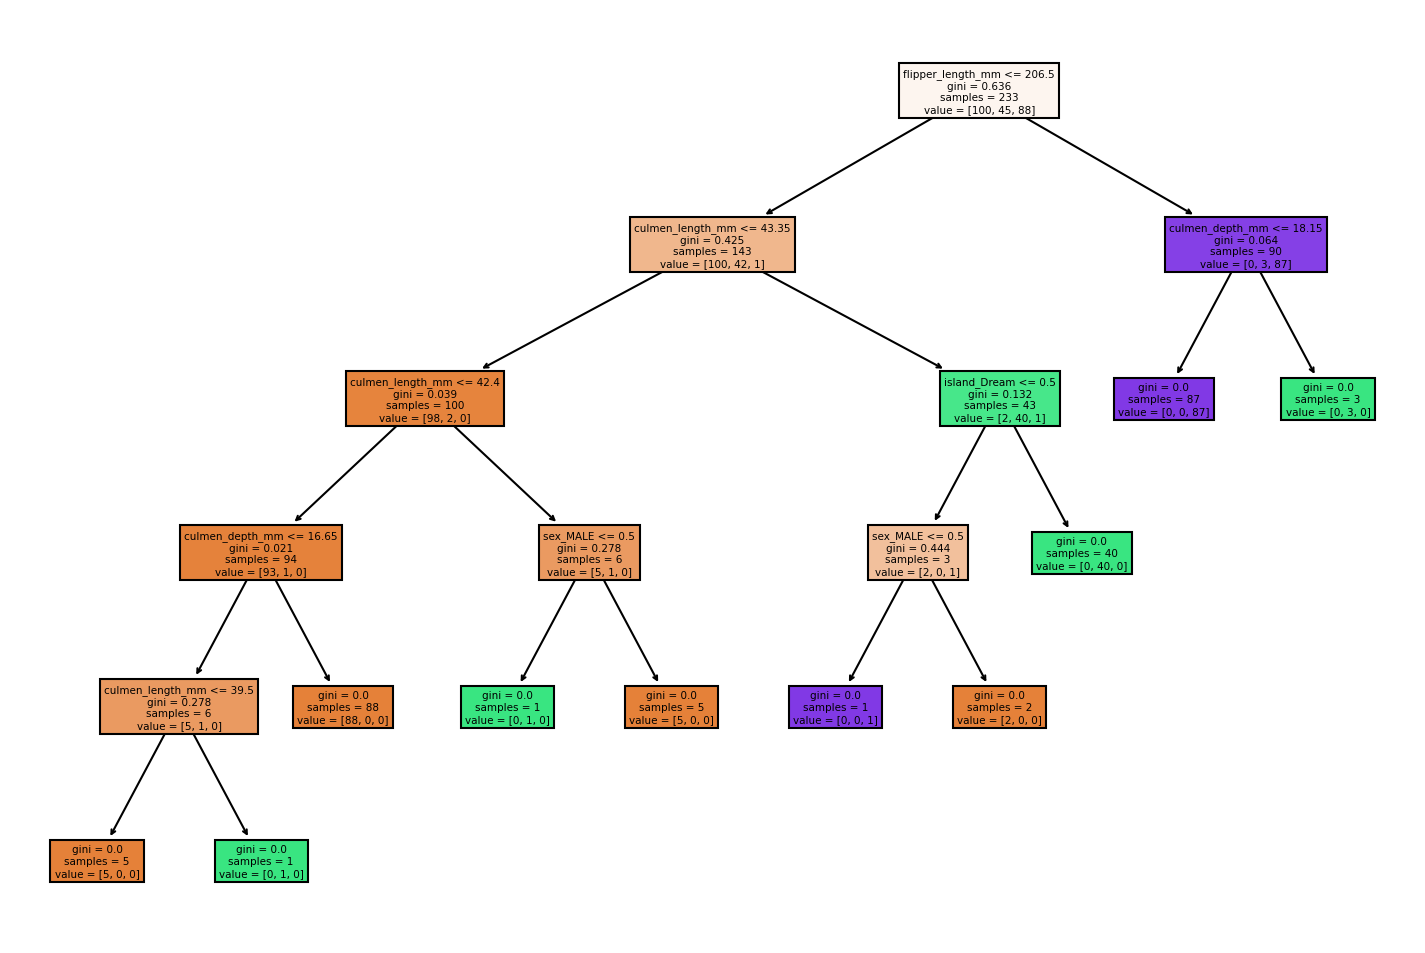

In [51]:
plt.figure(figsize=(12,8),dpi=150)
plot_tree(model, filled=True, feature_names=X.columns);

In [52]:
def model_result(model):
    pengu_pred = model.predict(X_test)
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
    print(classification_report(y_test, pengu_pred),"\n")
    plt.figure(figsize=(12,10), dpi=120)
    plot_tree(model, filled=True, feature_names=X.columns);

### Max Depth

In [53]:
lessTree = DecisionTreeClassifier(max_depth=2)
lessTree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

              precision    recall  f1-score   support

      Adelie       0.93      0.91      0.92        46
   Chinstrap       0.87      0.87      0.87        23
      Gentoo       0.97      1.00      0.98        31

    accuracy                           0.93       100
   macro avg       0.92      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100
 



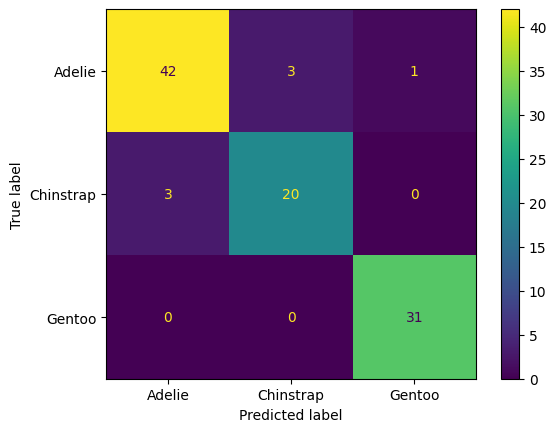

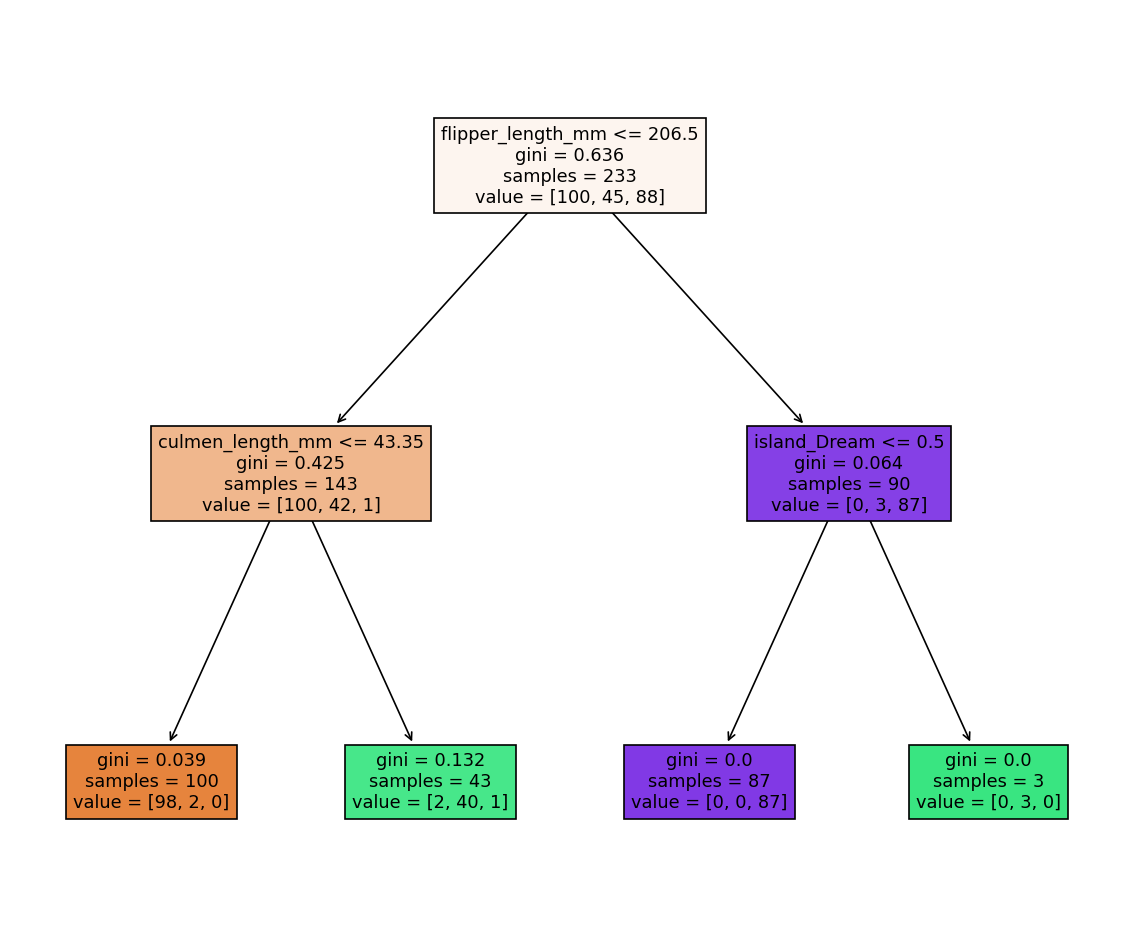

In [54]:
model_result(lessTree)

### Max Leaf

In [55]:
lessLeaf = DecisionTreeClassifier(max_leaf_nodes=3)
lessLeaf.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=3)

              precision    recall  f1-score   support

      Adelie       0.93      0.91      0.92        46
   Chinstrap       0.90      0.78      0.84        23
      Gentoo       0.89      1.00      0.94        31

    accuracy                           0.91       100
   macro avg       0.91      0.90      0.90       100
weighted avg       0.91      0.91      0.91       100
 



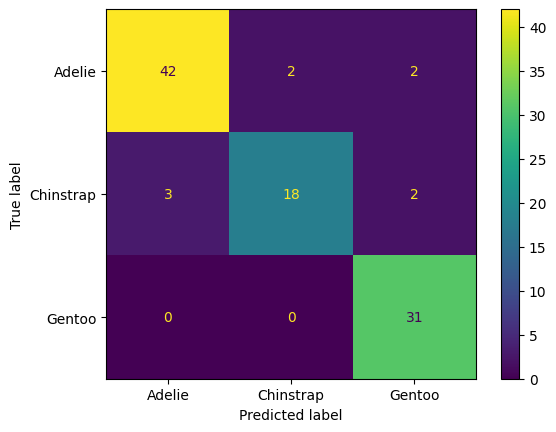

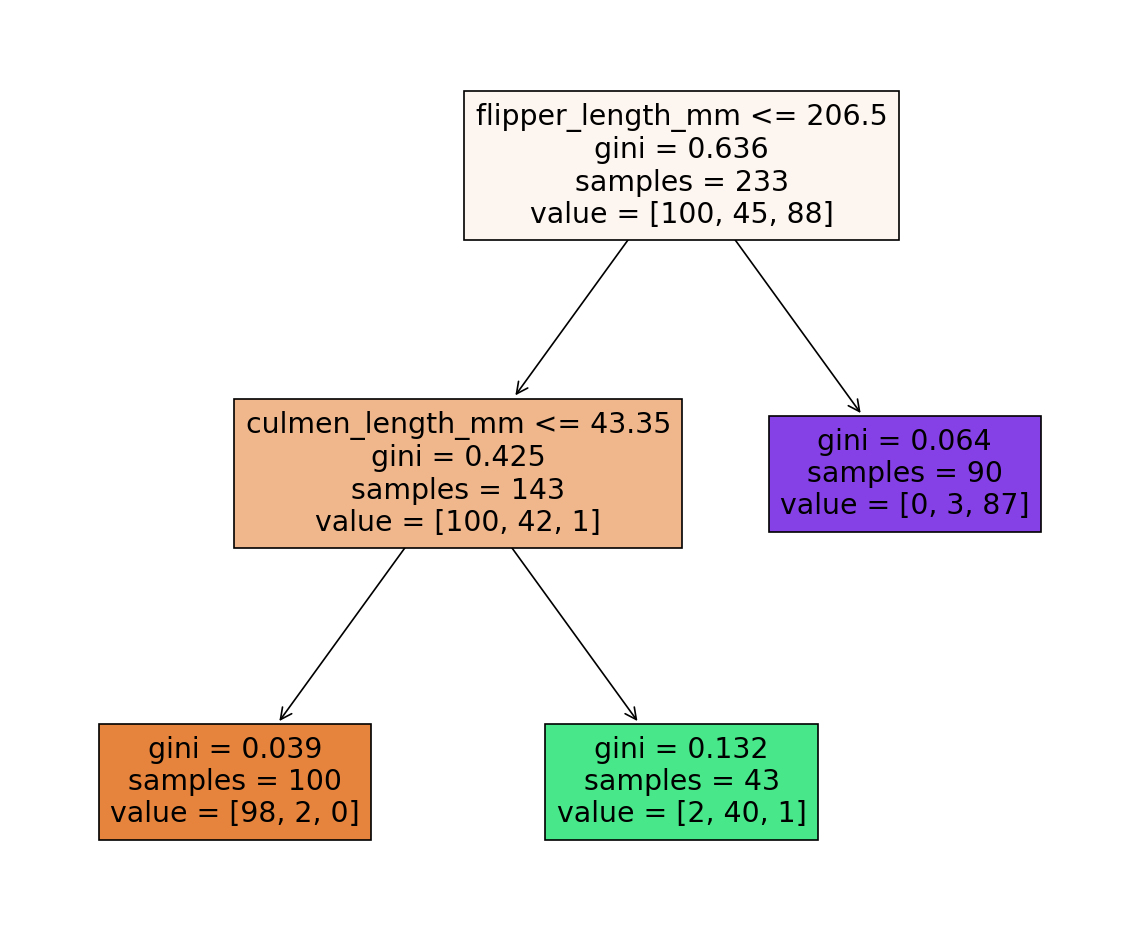

In [56]:
model_result(lessLeaf)

### Optimization

In [57]:
entropi = DecisionTreeClassifier(criterion="entropy")
entropi.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

              precision    recall  f1-score   support

      Adelie       1.00      0.93      0.97        46
   Chinstrap       0.92      1.00      0.96        23
      Gentoo       0.97      1.00      0.98        31

    accuracy                           0.97       100
   macro avg       0.96      0.98      0.97       100
weighted avg       0.97      0.97      0.97       100
 



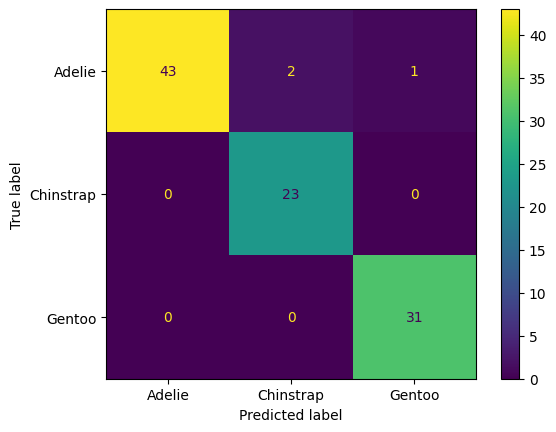

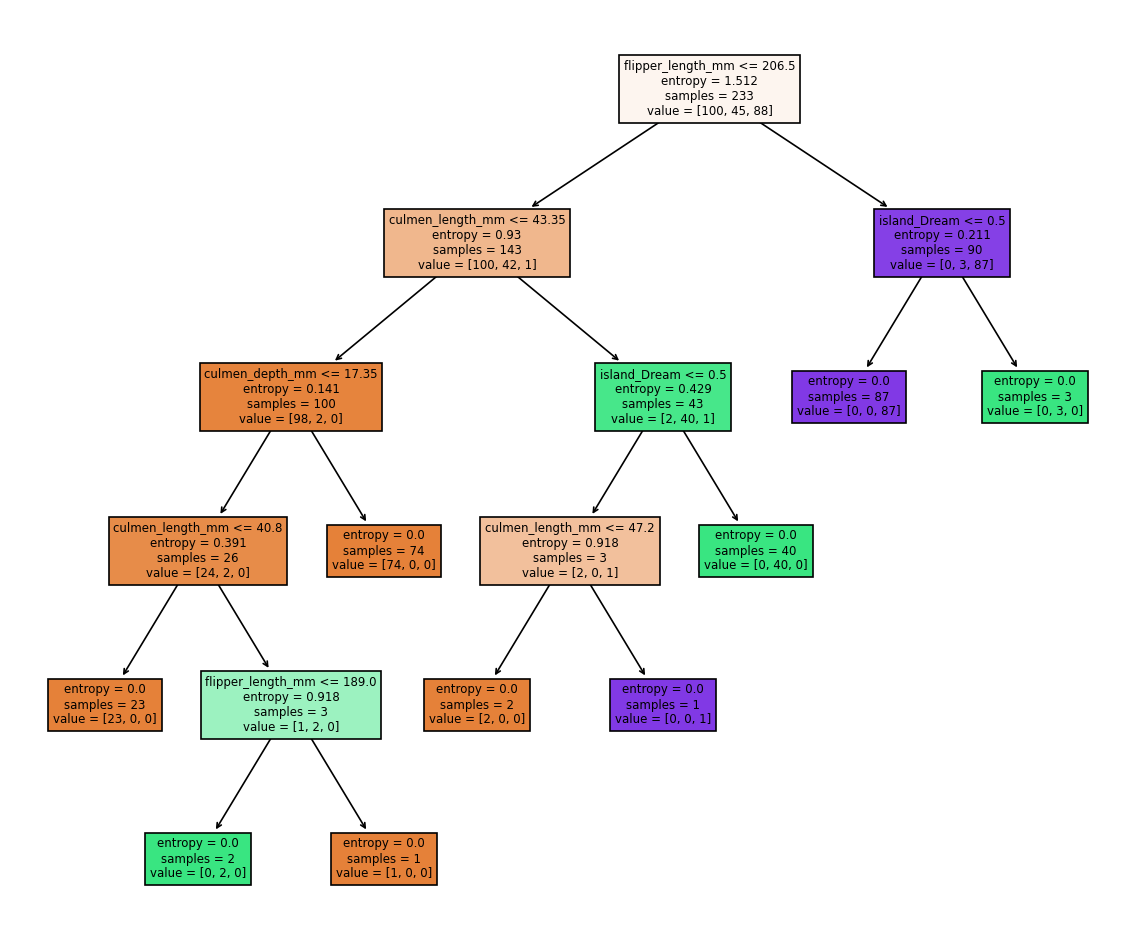

In [58]:
model_result(entropi)